In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

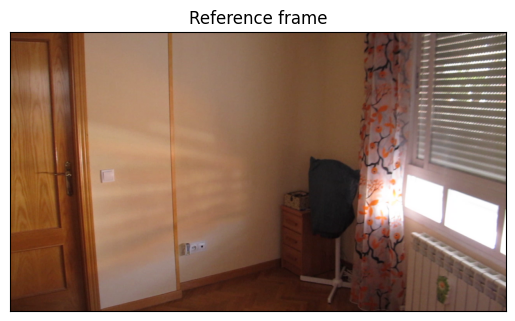

In [12]:
########### Section 2 = Loading the movie #######################
cap = cv2.VideoCapture('livingroom.mov')
##############################################
########### Section 3 = Printing the difference video #######################

# Set the frame number you want to extract
frame_number = 3

# Set the current frame to the frame number you want to extract
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the current frame
ret, frame = cap.read()

# Display the current frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Reference frame'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('6c_reference_frame.jpg', frame)  # Save the reference frame as an image
# Release the VideoCapture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


<span style="color:blue">
    For the reference frame selection, the paper highlighted that there are three strategies, <br>
    1. Using the first frame of the video, assuming it is away from the light source or window. <br>
    2. Using frame with highest intensity, where the window or light source is unocculded. <br>
    3. Using multiple frames as reference and selecting one that produces the best results. <br>

    Here, I have chosen to use the second strategy, as there are frames with highest intesity and unocculded. But conincidentally it was the first frame of the video. 
</span>

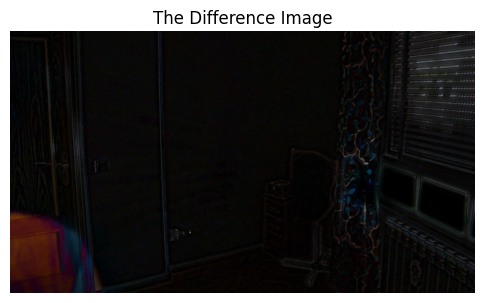

In [13]:
# Load the saved reference frame image
reference_frame = cv2.imread('6c_reference_frame.jpg')

# Create a VideoCapture object again for the video
cap = cv2.VideoCapture('livingroom.mov')

# Set the capture format to RGB
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc(*'RGB '))

# Initialize frame counter for difference frame filenames
frame_counter = 0

# Get the frame rate of the video
frame_rate = int(cap.get(5))

# Calculate the frame number
target_frame_number = 19 * frame_rate

# Loop through the frames of the original video
while True:
    ret, frame = cap.read()

    # Break the loop if we've reached the end of the video
    if not ret:
        break
    
    # Increment the frame counter
    frame_counter += 1
    
    # Apply Gaussian blur to the current frame
    frame = cv2.GaussianBlur(frame, (35, 35), 0)
    
    # Calculate the absolute difference between the current frame and the reference frame
    diff_frame = cv2.absdiff(reference_frame, frame)

    # Display and save the difference frame
    cv2.imshow('Difference Frame', diff_frame)
    
##############################################

########### Section 4 =  Pinspeck image #######################
    if frame_counter == target_frame_number:
            diff_frame = cv2.flip(diff_frame, 0)
            cv2.imwrite('6_d_pinspeck.jpg', diff_frame)  # Save the pinspeck image
            
            
    # Exit the loop when 'q' is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

plt.figure(figsize=(6, 6))
diff_frame = cv2.cvtColor(diff_frame, cv2.COLOR_BGR2RGB)
plt.imshow(diff_frame)
plt.title('The Difference Image')
plt.axis('off')
plt.show()

# Release the VideoCapture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()



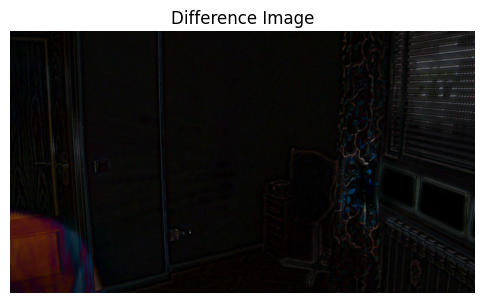

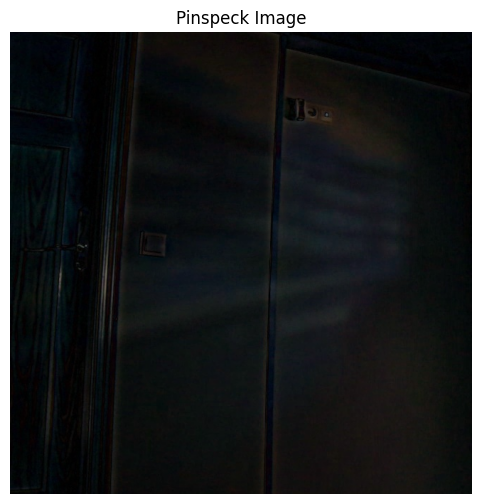

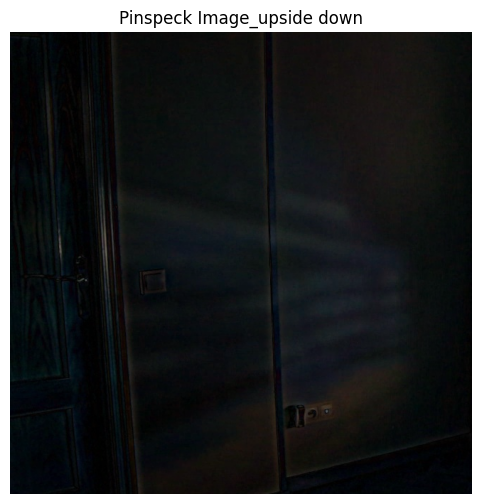

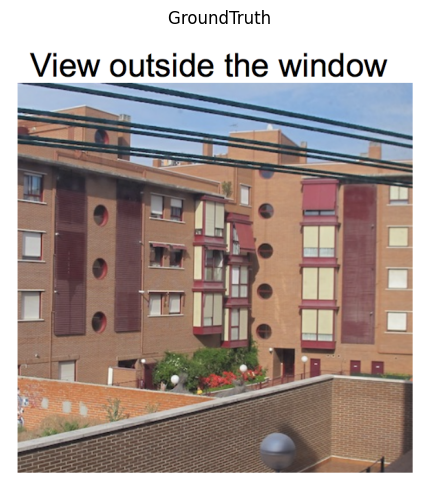

In [16]:
difference_img = cv2.imread('6_d_pinspeck.jpg')
difference_img = cv2.cvtColor(difference_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(diff_frame)
plt.title('Difference Image')
plt.axis('off')
plt.show()
pinspeck_img = difference_img[50:700, 50:700]
pinspeck_img = cv2.cvtColor(pinspeck_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(pinspeck_img)
plt.title('Pinspeck Image')
plt.axis('off')
plt.show()

pinspeck_img_upside_down = cv2.flip(pinspeck_img, 0)
plt.figure(figsize=(6, 6))
plt.imshow(pinspeck_img_upside_down)
plt.title('Pinspeck Image_upside down')
plt.axis('off')
plt.show()

out_img = cv2.imread('Outdoorimage.png')
out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(out_img)
plt.title('GroundTruth ')
plt.axis('off')
plt.show()



<span style="color:blue">
    When observed,the final pinspeck images (cropped and flipped), it slightly matches the scene outside, shown in the ground truth.<br>
    In the pinspeck image, the block from the ground truth image can be obsreved. A slightly distorted building shape can be obsereved. <br>
    There are maroon and blue hues in the pinspeck image, matching the building and sky colors respectively in the groundtruth<br>

######################################################

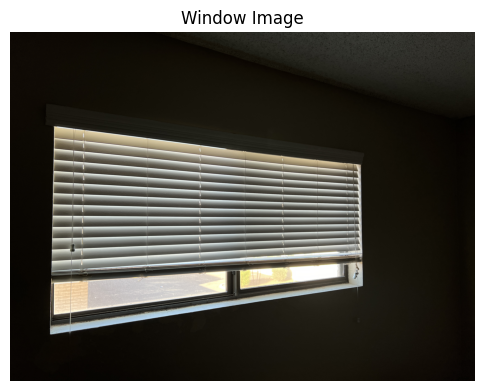

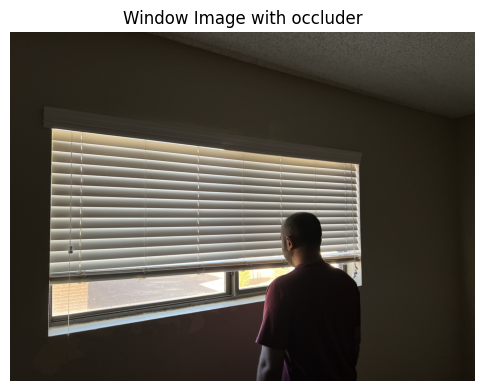

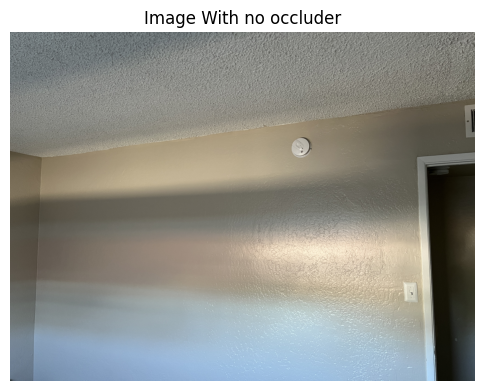

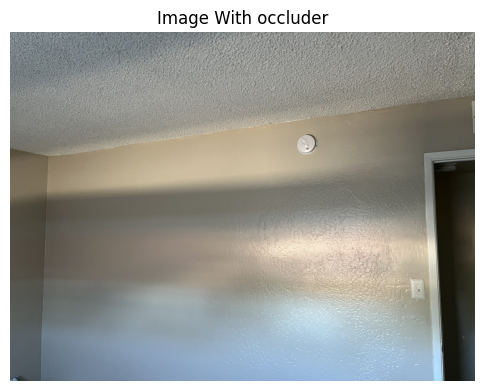

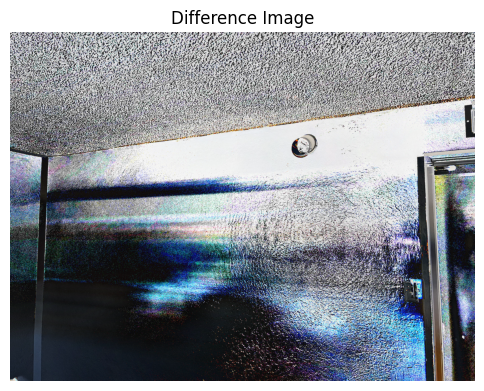

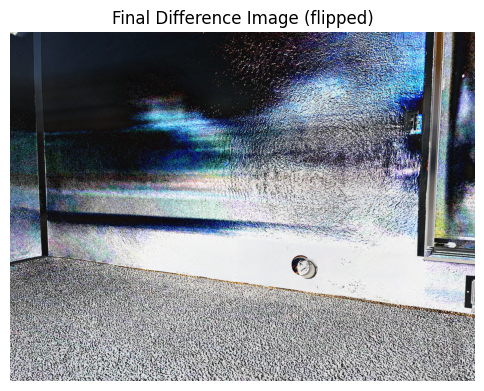

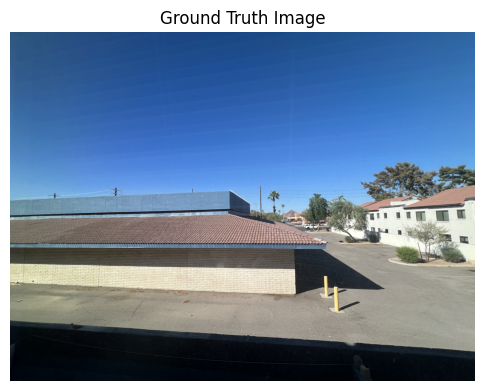

In [18]:
########### Section 5 =  Create own Pinspeck image #######################

window_img = cv2.imread('IMG_2981.JPEG')
window_img = cv2.cvtColor(window_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(window_img)
plt.title('Window Image')
plt.axis('off')
plt.show()

window_with_occluder_img = cv2.imread('IMG_2980.JPEG')
window_with_occluder_img = cv2.cvtColor(window_with_occluder_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(window_with_occluder_img)
plt.title('Window Image with occluder')
plt.axis('off')
plt.show()


without_occluder_img = cv2.imread('IMG_2978.JPEG')
without_occluder_img = cv2.cvtColor(without_occluder_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(without_occluder_img)
plt.title('Image With no occluder')
plt.axis('off')
plt.show()

with_occluder_img = cv2.imread('IMG_2979.JPEG')
with_occluder_img = cv2.cvtColor(with_occluder_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(with_occluder_img)
plt.title('Image With occluder')
plt.axis('off')
plt.show()

difference_img = without_occluder_img - with_occluder_img
plt.figure(figsize=(6, 6))
plt.imshow(difference_img)
plt.title('Difference Image')
plt.axis('off')
plt.show()

difference_img_flip = cv2.flip(difference_img, 0)
plt.figure(figsize=(6, 6))  
plt.imshow(difference_img_flip)
plt.title('Final Difference Image (flipped)')
plt.axis('off')
plt.show()

ground_truth = cv2.imread('IMG_2972.JPEG')
ground_truth = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(ground_truth)
plt.title('Ground Truth Image')
plt.axis('off')
plt.show()



<span >
    The images were taken from my bedroom, where the light from the window is being cast on the wall opposite to the window. The occluder was me in this scenario. <br>
    When observed,the final difference image (flipped), it slightly matches the scene outside, shown in the ground truth. It is not perfect but some things can be observed. <br>
    In the final difference image, the block on the left side from the ground truth image can be obsreved on the left as well. A vague building shape can be obsereved on the left side of the final difference image. <br>
    There are maroon and blue hues in the pinspeck image, matching the building and sky colors respectively in the groundtruth<br>
    The yellow poles from the ground truth can be ovsreved in the far right of the final difference image<br>

######################################################